In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#dataset = 'Dataset_cleaned'
dataset = 'RichDataset'
#dataset = 'BigDataset'

In [3]:
def load_photos(directory):
    images = []
    labels = []
    names = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = int(name.split('_')[0])
        names.append('_'.join(name.split('_')[1:]))
        labels.append(value)
        images.append(image)
    return images, labels, names

# load images from both train and test groups
directory = '../../../Patate_data/data/'+dataset+'/Train'
images, labels, names = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../../../Patate_data/data/'+dataset+'/Val'
images_val, labels_val, names_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)
print(len(names))

Loaded Images and labels for training: 1538
Loaded Images and labels for validation: 196
1538


In [4]:
def load_photos_2(directory):
    images = []
    labels = []
    names=[]
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = name.split('_')[0]
        names.append('_'.join(name.split('_')[1:]))
        value = 0 if value == '0' else 1
        labels.append(value)
        images.append(image)
    return images, labels, names

directory = '../../../Patate_data/data/'+dataset+'-anticipation/Train'
images_2, labels_2, names_2 = load_photos(directory)
nb_images_2 = len(images_2)
print('Loaded Images and labels for training: %d' % nb_images_2)
directory = '../../../Patate_data/data/'+dataset+'-anticipation/Val'
images_val_2, labels_val_2, names_val_2 = load_photos(directory)
nb_images_val_2 = len(images_val_2)
print('Loaded Images and labels for validation: %d' % nb_images_val_2)
print(len(names_2))

Loaded Images and labels for training: 696
Loaded Images and labels for validation: 180
696


In [5]:
new_labels_speed=[]
for elem in names:
    if elem in names_2:
        idx = names_2.index(elem)
        new_labels_speed.append(labels_2[idx])
    else:
        new_labels_speed.append(0)
        
new_labels_val_speed=[]
for elem in names_val:
    if elem in names_val_2:
        idx = names_val_2.index(elem)
        new_labels_val_speed.append(labels_val_2[idx])
    else:
        new_labels_val_speed.append(0)

In [6]:
print(len(labels), len(new_labels_speed),len(new_labels_val_speed), len(labels_val))

1538 1538 196 196


In [7]:
#normalise datas
images = np.array(images)
images = images[:, 40:, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 40:, :, :]
images_val /= 255

((1538, 88, 160, 3), <matplotlib.image.AxesImage at 0x164221e6da0>)

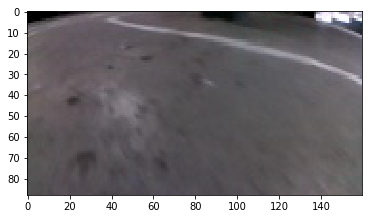

In [8]:
images.shape, plt.imshow(images[40])


In [9]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)
labels_2 = np.array(new_labels_speed)
labels_val_2 = np.array(new_labels_val_speed)

In [10]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)
labelsd_2 = pd.get_dummies(labels_2)

In [11]:
#print(labelsd) 
labelsd_2

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [12]:
#convert to np.array again
labelsd = np.array(labelsd)
labelsd_2 = np.array(labelsd_2)

In [13]:
#check if OK
labels[1], labelsd[1]
labels_2[1], labelsd_2[1]

(0, array([1, 0], dtype=uint8))

In [14]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [15]:
#from keras.models import load_model
#model = load_model('model-BigDataset.h5')

In [20]:
K.clear_session()

img_in = Input(shape=(88, 160, 3), name='img_in')

x = img_in

x = Convolution2D(2, (4,4), strides=(4,4), activation='relu')(x)
x = Convolution2D(4, (4,4), strides=(4,4), activation='relu')(x)
x = Convolution2D(8, (4,4), strides=(4,4), activation='relu')(x)
#x = Convolution2D(128, (3,3), strides=(4,4), activation='relu')(x)

x = Flatten(name='flattened')(x)
x = Dense(100, activation='relu')(x)
x = Dropout(.1)(x) 
x = Dense(50, activation='relu')(x)
x = Dropout(.1)(x)

#categorical output
out = Dense(3, activation='softmax')(x)
out_2 = Dense(2, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out, out_2])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [21]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 88, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 22, 40, 8)    392         img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 5, 10, 8)     1032        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 1, 2, 8)      1032        conv2d_2[0][0]                   
__________________________________________________________________________________________________
flattened 

In [32]:
h = model.fit(images, [labelsd, labelsd_2], batch_size=32, epochs=200, verbose=1)

Epoch 1/200
1538/1538 [==============================] - 1s 508us/step - loss: 0.0432 - dense_3_loss: 0.0265 - dense_4_loss: 0.0167 - dense_3_acc: 0.9922 - dense_4_acc: 0.9954
Epoch 2/200
1538/1538 [==============================] - 1s 526us/step - loss: 0.0703 - dense_3_loss: 0.0383 - dense_4_loss: 0.0320 - dense_3_acc: 0.9863 - dense_4_acc: 0.9889
Epoch 3/200
1538/1538 [==============================] - 1s 519us/step - loss: 0.0331 - dense_3_loss: 0.0172 - dense_4_loss: 0.0160 - dense_3_acc: 0.9948 - dense_4_acc: 0.9954
Epoch 4/200
1538/1538 [==============================] - 1s 568us/step - loss: 0.0269 - dense_3_loss: 0.0135 - dense_4_loss: 0.0134 - dense_3_acc: 0.9954 - dense_4_acc: 0.9935
Epoch 5/200
1538/1538 [==============================] - 1s 557us/step - loss: 0.0470 - dense_3_loss: 0.0159 - dense_4_loss: 0.0311 - dense_3_acc: 0.9941 - dense_4_acc: 0.9876
Epoch 6/200
1538/1538 [==============================] - 1s 518us/step - loss: 0.0345 - dense_3_loss: 0.0191 - dense_4_l

1538/1538 [==============================] - 1s 500us/step - loss: 0.0213 - dense_3_loss: 0.0089 - dense_4_loss: 0.0124 - dense_3_acc: 0.9987 - dense_4_acc: 0.9954
Epoch 94/200
1538/1538 [==============================] - 1s 488us/step - loss: 0.0211 - dense_3_loss: 0.0116 - dense_4_loss: 0.0096 - dense_3_acc: 0.9948 - dense_4_acc: 0.9954
Epoch 95/200
1538/1538 [==============================] - 1s 486us/step - loss: 0.0551 - dense_3_loss: 0.0385 - dense_4_loss: 0.0166 - dense_3_acc: 0.9844 - dense_4_acc: 0.9941
Epoch 96/200
1538/1538 [==============================] - 1s 515us/step - loss: 0.0253 - dense_3_loss: 0.0137 - dense_4_loss: 0.0116 - dense_3_acc: 0.9967 - dense_4_acc: 0.9954
Epoch 97/200
1538/1538 [==============================] - 1s 479us/step - loss: 0.0383 - dense_3_loss: 0.0211 - dense_4_loss: 0.0172 - dense_3_acc: 0.9922 - dense_4_acc: 0.9941
Epoch 98/200
1538/1538 [==============================] - 1s 515us/step - loss: 0.0226 - dense_3_loss: 0.0080 - dense_4_loss: 0.

1538/1538 [==============================] - 1s 569us/step - loss: 0.0123 - dense_3_loss: 0.0077 - dense_4_loss: 0.0046 - dense_3_acc: 0.9967 - dense_4_acc: 0.9987
Epoch 185/200
1538/1538 [==============================] - 1s 522us/step - loss: 0.0500 - dense_3_loss: 0.0373 - dense_4_loss: 0.0127 - dense_3_acc: 0.9889 - dense_4_acc: 0.9961
Epoch 186/200
1538/1538 [==============================] - 1s 560us/step - loss: 0.0141 - dense_3_loss: 0.0084 - dense_4_loss: 0.0057 - dense_3_acc: 0.9980 - dense_4_acc: 0.9980
Epoch 187/200
1538/1538 [==============================] - 1s 537us/step - loss: 0.0183 - dense_3_loss: 0.0102 - dense_4_loss: 0.0081 - dense_3_acc: 0.9967 - dense_4_acc: 0.9967
Epoch 188/200
1538/1538 [==============================] - 1s 556us/step - loss: 0.0197 - dense_3_loss: 0.0162 - dense_4_loss: 0.0035 - dense_3_acc: 0.9935 - dense_4_acc: 0.9993
Epoch 189/200
1538/1538 [==============================] - 1s 546us/step - loss: 0.0158 - dense_3_loss: 0.0094 - dense_4_los

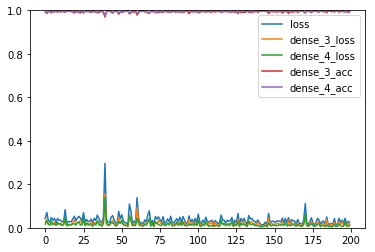

In [33]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
#print(historydf)
historydf.plot(ylim=(0,1))

In [34]:
# Get predictions
all_preds = model.predict(images_val)
#print(all_preds[0])
#print(all_preds[1])

# Check predictions
idx = [np.argmax(line) for line in all_preds[0]]
idx_2 = [np.argmax(line) for line in all_preds[1]]
#print("idx",idx)
#print("idx_2",idx_2)

compare = [1 if hyp == ref-1 else 0 for (hyp,ref) in zip(idx, labels_val)]
compare_2 = [1 if hyp == ref-1 else 0 for (hyp,ref) in zip(idx, labels_val)]

idx_error = [i  for i,elem in enumerate(compare) if elem==0]
error =[names[i]  for i,elem in enumerate(compare) if elem==0]
error_2 =[names[i]  for i,elem in enumerate(compare_2) if elem==0]
set_error=error+[elem for elem in error_2 if elem not in error]
#print(idx_error,error, error_2, set_error)
#print(len(error), len(error_2), len(set_error))
#print(compare, "\n"+str(compare_2),sum(compare), sum(compare_2)) 
print(round(sum(compare)/len(idx)*100,2),round(sum(compare_2)/len(idx)*100,2))


73.98 73.98


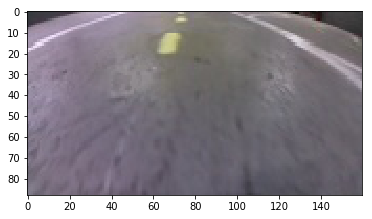

In [35]:
plt.imshow(images_val[53])

In [36]:
import math
i = 0
res = 0
for value in idx:
    if value +1 != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.2602040816326531

In [37]:
model.save('model-MHRace_clean.h5')